##  

Group 8: Sana Almagbaly, Nadège Bärtschi, Clara Bottinelli, Zélia Décaillet

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [74]:
pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
repository_url = "https://raw.githubusercontent.com/baertsch/FIN-429/main/"
# Revenues (annual frequency)
rev_y = pd.read_excel(repository_url+"DS_REV_USD_Y.xlsx")
# Return index (monthly frequency)
ri_m = pd.read_excel(repository_url+"DS_RI_USD_M.xlsx")
# Return index (annual frequency)
ri_y = pd.read_excel(repository_url+"DS_RI_USD_Y.xlsx")
# Scope 1
scope1 = pd.read_excel(repository_url+"Scope_1.xlsx")
# Scope 2
scope2 = pd.read_excel(repository_url+"Scope_2.xlsx")
# Market capitalization (monthly frequency)
mv_m = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")
# Market capitalization (annual frequency)
mv_y = pd.read_excel(repository_url+"DS_MV_T_USD_Y.xlsx")
#risk free rate over the period
rf_rate = pd.read_excel(repository_url+ "Risk_Free_Rate.xlsx")


In [76]:
rf_rate['RF'] = rf_rate['RF']*100

In [77]:
#Computing the avg Rf rate
avg_rf_rate = rf_rate['RF'].mean()
avg_rf_rate

14.733333333333333

In [78]:
mv_m

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
0,SCHLUMBERGER,AN8068571086,30859.99,33574.85,40611.13,43352.43,43387.86,41861.39,42466.02,42074.79,...,78342.00,67864.94,65592.31,67436.13,68571.81,62465.84,59239.83,56585.01,62050.05,53708.59
1,ALUAR,ARALUA010258,1129.31,1328.64,1395.07,1362.23,1340.19,1317.78,1209.89,1395.69,...,2915.90,2698.60,3165.16,3033.34,2875.18,2694.70,2494.63,2381.96,2635.60,2425.22
2,BANCO BBVA ARGENTINA,ARP125991090,1656.3,1570.39,1851.34,1656.82,1388.70,1352.22,1541.05,1551.54,...,2192.63,2435.11,3210.54,2818.34,2409.49,2832.34,2697.85,3274.73,3745.74,4516.58
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1414.37,1407.47,1463.08,1460.01,1356.04,893.05,955.70,990.45,...,4698.80,4340.63,5146.56,4829.15,4589.92,3971.89,3870.75,3641.89,4278.73,3903.71
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4985.97,5043.53,5210.65,4935.22,4950.74,5129.83,4947.90,4652.68,4819.74,4835.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,ALTRON LIMITED A,ZAE000191342,105.41,115.91,106.13,113.98,90.17,76.58,74.37,85.52,...,239.09,248.89,280.70,295.36,388.98,393.90,413.00,427.45,460.04,463.34
2560,ABSA GROUP,ZAE000255915,2882.25,2649.35,2483.04,2348.10,2295.91,2374.43,2458.35,2347.50,...,6996.32,6906.91,7086.12,7760.90,7856.60,8858.64,9105.44,8530.48,8540.85,8993.55
2561,NORTHAM PLATINUM HLDGS,ZAE000298253,230.57,259.71,207.52,249.66,193.50,206.19,264.77,300.82,...,2363.04,2632.31,2730.05,2762.38,3107.39,2352.88,2507.23,2918.45,2467.31,2045.45
2562,AVENG,ZAE000302618,436.66,445.83,454.09,389.04,351.95,276.11,312.53,299.24,...,39.68,42.32,39.84,48.32,61.15,71.10,70.09,66.52,78.76,84.89


In [79]:
# Filter for European firms
european_countries = ["AT", "BE", "DK", "FI", "FR", "DE", "IE", "IT", "NL", 
                       "NO", "PT", "ES", "SE", "CH", "GB"]
def filter_europe(df, codes):
    df['Country Code']=df['ISIN'].str[:2]
    df = df[df['Country Code'].isin(codes)]
    return df
rev_y = filter_europe(rev_y,european_countries)
ri_m = filter_europe(ri_m,european_countries)
ri_y = filter_europe(ri_y,european_countries)
scope1 = filter_europe(scope1,european_countries)
scope2 = filter_europe(scope2,european_countries)
mv_m = filter_europe(mv_m,european_countries)
mv_y = filter_europe(mv_y,european_countries)


In [80]:
# For missing values between two availables years, we take the value of the previous year
rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_m.iloc[:,2:-1] = ri_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_y.iloc[:,2:-1] = ri_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope1.iloc[:,2:-1] = scope1.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope2.iloc[:,2:-1] = scope2.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_m.iloc[:,2:-1] = mv_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_y.iloc[:,2:-1] = mv_y.iloc[:,2:-1].fillna(method='ffill', axis=1)

/tmp/ipykernel_37/4179368342.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/tmp/ipykernel_37/4179368342.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ri_m.iloc[:,2:-1] = ri_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
/tmp/ipykernel_37/4179368342.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ri_y.iloc[:,2:-1] = ri_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/tmp/ipykernel_37/4179368342.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scope1.iloc[:,2:-1] = scope1.iloc[:,2:-1].fillna(method='ffill', axis=1)
/tmp/ipykernel_37/41793683

# Question 1
We take all our data, so all european firms
Then for question 2 and onward we take all european firms with carbon data

In [81]:
ri_m.sort_values(by=['ISIN'])

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00,Country Code
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.56,204.41,205.06,212.47,204.94,192.71,199.63,200.28,240.26,AT
5,FLUGHAFEN WIEN,AT00000VIE62,147.79,156.25,153.83,158.62,137.27,148.95,159.68,151.08,...,1996.86,2090.26,2127.00,2320.32,2185.23,2200.73,2173.39,2114.91,2123.14,AT
6,RAIFFEISEN BANK INTL.,AT0000606306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.37,70.38,78.90,80.27,80.70,72.48,78.94,82.80,92.42,AT
7,ERSTE GROUP BANK,AT0000652011,102.94,94.91,97.74,100.50,96.13,97.86,102.06,102.43,...,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69,AT
8,TELEKOM AUSTRIA,AT0000720008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294.09,311.40,300.32,319.06,318.44,268.58,268.82,267.24,271.32,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,ELECTROLUX B,SE0016589188,626.16,533.00,470.45,473.03,432.63,431.17,397.88,380.53,...,1411.58,1234.39,1323.56,1433.71,1446.38,1240.35,1110.84,1237.50,1358.80,SE
1711,ATLAS COPCO A,SE0017486889,257.69,221.48,202.18,212.75,209.47,198.64,173.50,187.90,...,13149.83,12955.25,12248.54,12519.58,13347.99,11376.34,11068.91,10605.37,11684.45,SE
1712,MODERN TIMES GROUP MTG B,SE0018012494,81.19,76.83,85.51,79.92,80.98,73.42,78.73,65.79,...,101.69,92.24,87.78,86.17,89.15,81.25,96.38,98.24,106.53,SE
1713,WIHLBORGS FASTIGHETER,SE0018012635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174.14,169.81,185.96,193.55,212.39,191.59,186.07,174.23,182.38,SE


In [82]:
ri_m.columns = [pd.to_datetime(col, errors='ignore') if '-' in str(col) else col for col in ri_m.columns]


ri = ri_m.melt(id_vars=["NAME", "ISIN", "Country Code"], var_name="Date", value_name="Return_Index")
ri["Date"] = pd.to_datetime(ri["Date"], errors='coerce')
ri = ri[(ri["Date"] >= '2013-12-29') & (ri["Date"] <= '2024-12-31')] #Takes period 2014-2024
nb = ri.groupby("NAME").size() # Number of observations per firm
ri = ri[ri["NAME"].isin(nb[nb == 133].index)] # Keep only firms with 133 observations
ri.sort_values(by=["ISIN", "Date"], inplace=True)
ri['Monthly_Return'] = ri.groupby('ISIN')['Return_Index'].pct_change() #Computes returns
ri.dropna(subset=['Monthly_Return'], inplace=True)
ri.columns

/tmp/ipykernel_37/3533070589.py:10: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ri['Monthly_Return'] = ri.groupby('ISIN')['Return_Index'].pct_change() #Computes returns


Index(['NAME', 'ISIN', 'Country Code', 'Date', 'Return_Index',
       'Monthly_Return'],
      dtype='object')

In [83]:
# Identify firms with inf values in indiv_return, the inf values are due to 0 returns
# Only 4 firms had inf values
inf_firms = ri[ri['Monthly_Return'].isin([np.inf, -np.inf])]['NAME'].unique()

# Drop firms with inf values
ri = ri[~ri['NAME'].isin(inf_firms)]

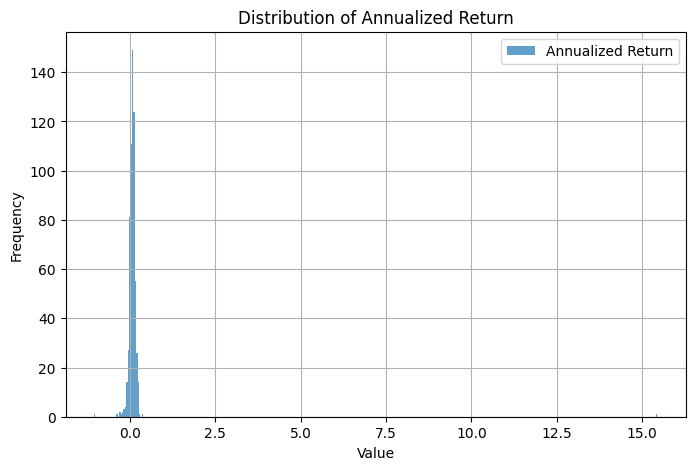

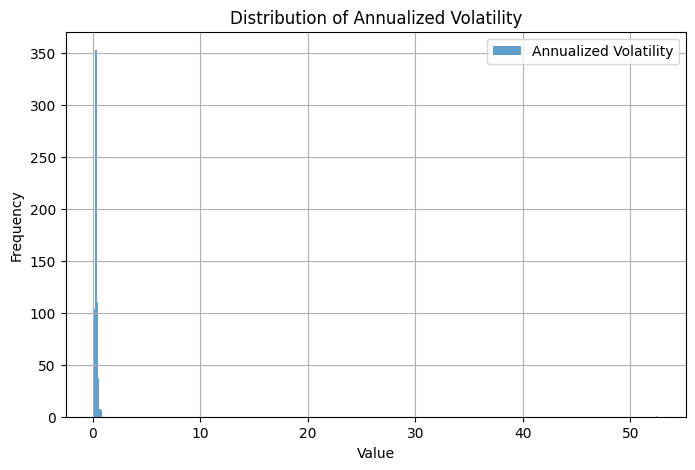

In [84]:
# Compute annualized return (Mean monthly return * 12)
annualized_return = ri.groupby("NAME")["Monthly_Return"].mean() * 12

# Compute annualized volatility (Std of monthly returns * sqrt(12))
annualized_volatility = ri.groupby("NAME")["Monthly_Return"].std() * np.sqrt(12)

# Merge into a single DataFrame
df_stats = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility
}).dropna()  # Drop NaN values if any

# Plot Histogram of Annualized Returns & Volatility
plt.figure(figsize=(8, 5))
plt.hist(df_stats["Annualized Return"], bins=400, alpha=0.7, label="Annualized Return")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Return")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df_stats["Annualized Volatility"], bins=400, alpha=0.7, label="Annualized Volatility")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Volatility")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# Let's identify the outlier and drop it 
df_stats[df_stats['Annualized Return']>12.5]
df_stats = df_stats.drop("ATOS", axis=0)
ri = ri[ri['NAME']!='ATOS']

The firm Atos has a high return in November 2024 leading of 330.96 USD. This can be explained the share capital increase in the amount of around 233 million EUR. 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


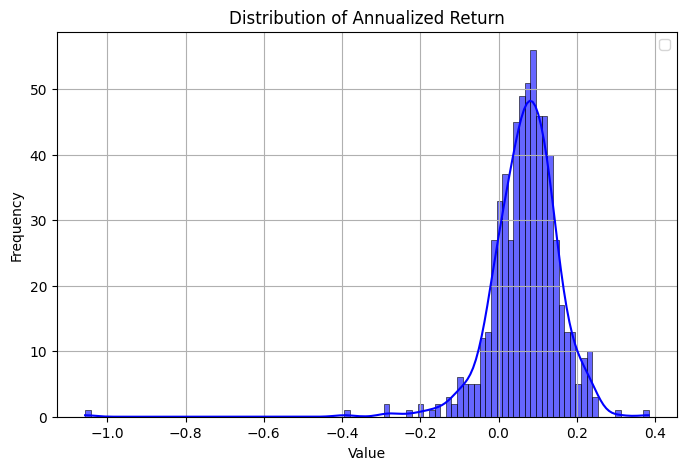

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


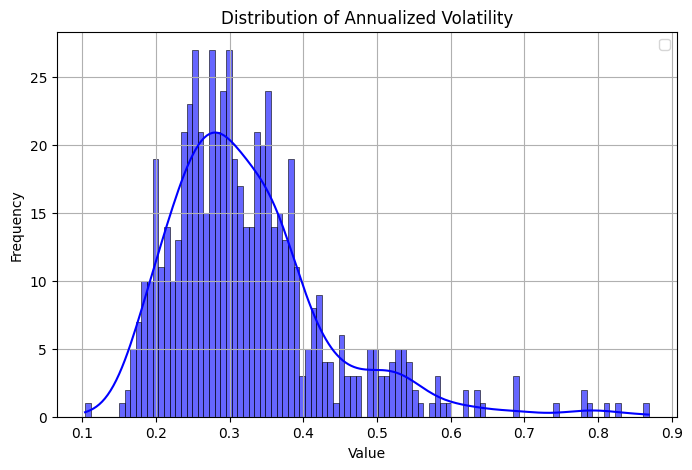

In [86]:
# Compute annualized return (Mean monthly return * 12)
annualized_return = ri.groupby("NAME")["Monthly_Return"].mean() * 12

# Compute annualized volatility (Std of monthly returns * sqrt(12))
annualized_volatility = ri.groupby("NAME")["Monthly_Return"].std() * np.sqrt(12)

# Merge into a single DataFrame
df_stats = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility
}).dropna()

# Plot Histogram of Annualized Returns & Volatility
plt.figure(figsize=(8,5))
sns.histplot(df_stats["Annualized Return"], bins=100, kde=True, color="blue", alpha=0.6)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Return")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_stats["Annualized Volatility"], bins=100, kde=True, color="blue", alpha=0.6)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Volatility")
plt.legend()
plt.grid(True)
plt.show()

Source: https://augmentationdecapital.atos.net/pdf/PR-Launch_of_capital_increase_with_preferential_subscription_rights-November82024.pdf 

In [87]:
correlation = df_stats["Annualized Return"].corr(df_stats["Annualized Volatility"])
correlation

-0.2647776325567527

This indicates that higher-volatility firms tend to have lower returns, while lower-volatility firms exhibit higher returns. This contradicts traditional financial theory, which predicts a positive risk-return tradeoff (Markowitz, 1952; Sharpe, 1964), and instead aligns with the low-risk anomaly, where low-risk assets generate superior returns. 

A possible explanation for this finding is provided by behavioral finance, particularly the study by Kempf, Merkle, and Niessen-Ruenzi (2013). Their research shows that investors often associate lower risk with higher expected returns, leading to mispricing in financial markets. Stocks perceived as stable and safe attract greater demand, increasing their valuations and returns, while riskier stocks may face persistent underperformance due to investor aversion. 

# Question 2

In [88]:
rf

NameError: name 'rf' is not defined

In [18]:
scope1.dropna(inplace=True)
scope2.dropna(inplace=True)

In [19]:
scope1.head()

,NAME,ISIN,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Country Code
6,RAIFFEISEN BANK INTL.,AT0000606306,305.0,305.0,208.0,6027.0,6508.0,5944.0,7073.0,6221.0,4827.0,6060.0,6060.0,AT
7,ERSTE GROUP BANK,AT0000652011,32749.0,32749.0,49122.0,22630.0,27854.0,27332.0,29950.0,24929.0,21530.0,20707.0,18701.0,AT
8,TELEKOM AUSTRIA,AT0000720008,27476.0,27476.0,27446.0,27419.0,27867.0,27003.0,22758.0,21411.0,21316.0,21316.0,24048.0,AT
9,ANDRITZ,AT0000730007,105229.0,105229.0,76563.0,64155.0,63396.0,71677.0,22452.0,25968.0,25968.0,24090.0,53194.0,AT
10,OMV,AT0000743059,12907485.0,12800000.0,11900000.0,11000000.0,11100000.0,11100000.0,10600000.0,10700000.0,13900000.0,11700000.0,10000000.0,AT


In [20]:
scope2.head()

,NAME,ISIN,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Country Code
6,RAIFFEISEN BANK INTL.,AT0000606306,327.0,327.0,164.0,25801.0,26621.0,26283.0,49708.0,46427.0,41064.0,35111.0,35111.0,AT
7,ERSTE GROUP BANK,AT0000652011,80456.0,80456.0,115063.0,54377.0,48635.0,34211.0,34884.0,32562.0,22884.0,18686.0,13153.0,AT
8,TELEKOM AUSTRIA,AT0000720008,195246.0,195246.0,176186.0,178038.0,190621.0,217310.0,193222.0,226294.0,176340.0,176340.0,115241.0,AT
9,ANDRITZ,AT0000730007,192698.0,192698.0,177491.0,140336.0,139209.0,169143.0,75411.0,108149.0,108149.0,80021.0,81035.0,AT
10,OMV,AT0000743059,665149.0,300000.0,400000.0,400000.0,300000.0,286079.0,400000.0,300000.0,1100000.0,900000.0,800000.0,AT


In [37]:
#Merge both dataset to have only the firms that have both scope 1 & scope 2 emissions
# _scope1 or _scope2 to distinguish them 
merge_df = pd.merge(scope1, scope2, on=['NAME','ISIN', 'Country Code'], suffixes=('_scope1', '_scope2'))
merge_df

,NAME,ISIN,2013_scope1,2014_scope1,2015_scope1,2016_scope1,2017_scope1,2018_scope1,2019_scope1,2020_scope1,...,2014_scope2,2015_scope2,2016_scope2,2017_scope2,2018_scope2,2019_scope2,2020_scope2,2021_scope2,2022_scope2,2023_scope2
0,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164315.0,164315.0,164315.0
1,FLUGHAFEN WIEN,AT00000VIE62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RAIFFEISEN BANK INTL.,AT0000606306,305.0,305.0,208.0,6027.0,6508.0,5944.0,7073.0,6221.0,...,327.0,164.0,25801.0,26621.0,26283.0,49708.0,46427.0,41064.0,35111.0,35111.0
3,ERSTE GROUP BANK,AT0000652011,32749.0,32749.0,49122.0,22630.0,27854.0,27332.0,29950.0,24929.0,...,80456.0,115063.0,54377.0,48635.0,34211.0,34884.0,32562.0,22884.0,18686.0,13153.0
4,TELEKOM AUSTRIA,AT0000720008,27476.0,27476.0,27446.0,27419.0,27867.0,27003.0,22758.0,21411.0,...,195246.0,176186.0,178038.0,190621.0,217310.0,193222.0,226294.0,176340.0,176340.0,115241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,ELECTROLUX B,SE0016589188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210581.0,216823.0,216823.0,189829.0
618,ATLAS COPCO A,SE0017486889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102000.0,138000.0,142000.0
619,MODERN TIMES GROUP MTG B,SE0018012494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.0,1180.0,402.9
620,WIHLBORGS FASTIGHETER,SE0018012635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0,2052.0,2052.0


In [41]:
merge_df.dropna(inplace=True)

In [22]:
ri['ISIN'].nunique()

617

In [43]:
firms = merge_df['ISIN'].unique()
df = ri[ri['ISIN'].isin(firms)]
df['ISIN'].nunique()

465

152 firms were dropped due to unavailable carbon data.

In [53]:
mv_m = mv_m.melt(id_vars=["NAME", "ISIN", "Country Code"], var_name="Date", value_name="Market Cap")
mv_m["Date"] = pd.to_datetime(mv_m["Date"], errors='coerce')
mv_m.dropna(inplace=True)
mv_m = mv_m[(mv_m["Date"] >= '2013-12-29') & (mv_m["Date"] <= '2024-12-31')]
mv_m.sort_values(by=["ISIN", "Date"], inplace=True)
mv_m

,NAME,ISIN,Country Code,Date,Market Cap
104496,STRABAG SE,AT000000STR1,AT,2013-12-31,3349.2
105118,STRABAG SE,AT000000STR1,AT,2014-01-31,3397.49
105740,STRABAG SE,AT000000STR1,AT,2014-02-28,3108.08
106362,STRABAG SE,AT000000STR1,AT,2014-03-31,2953.82
106984,STRABAG SE,AT000000STR1,AT,2014-04-30,3185.05
...,...,...,...,...,...
184733,BOLIDEN ORD SHS,SE0020050417,SE,2024-08-30,8386.34
185355,BOLIDEN ORD SHS,SE0020050417,SE,2024-09-30,9295.42
185977,BOLIDEN ORD SHS,SE0020050417,SE,2024-10-31,8455.81
186599,BOLIDEN ORD SHS,SE0020050417,SE,2024-11-29,8151.08


In [55]:
obs = mv_m.groupby("ISIN").size().reset_index() # Number of observations per firm
keep = obs[obs[0] == 133]['ISIN'] # Firms with less than 133 observations
mv_m= mv_m[mv_m["ISIN"].isin(keep)] # Keep only firms with 133 observations

In [57]:
df = pd.merge(df, mv_m, on=['NAME', 'ISIN', 'Country Code', 'Date'],how='inner')
df.head()

,NAME,ISIN,Country Code,Date,Return_Index,Monthly_Return,Market Cap
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-01-31,117.81,0.136723,11260.11
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-02-28,106.90,-0.092607,10217.37
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-03-31,102.24,-0.043592,9771.79
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-04-30,96.70,-0.054186,9241.74
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-05-30,102.77,0.062771,9822.5


In [59]:
df.columns

Index(['NAME', 'ISIN', 'Country Code', 'Date', 'Return_Index',
       'Monthly_Return', 'Market Cap'],
      dtype='object')

In [61]:
ew = df
ew["Year"] = ew["Date"].dt.year

# Group by firm (ISIN) and year, then calculate the annual average return
df_avg = ew.groupby(["NAME", "ISIN", "Country Code", "Year"]).agg(
    {"Monthly_Return": "mean"}
).reset_index()
# Convert to annualized return
df_avg["Annualized_Return"] = df_avg["Monthly_Return"] * 12  # Annualization

# Display the result
display(df_avg)

,NAME,ISIN,Country Code,Year,Monthly_Return,Annualized_Return
0,3I GROUP,GB00B1YW4409,GB,2014,0.014421,0.173058
1,3I GROUP,GB00B1YW4409,GB,2015,0.007101,0.085207
2,3I GROUP,GB00B1YW4409,GB,2016,0.023735,0.284819
3,3I GROUP,GB00B1YW4409,GB,2017,0.033440,0.401280
4,3I GROUP,GB00B1YW4409,GB,2018,-0.013757,-0.165085
...,...,...,...,...,...,...
5110,ZURICH INSURANCE GROUP,CH0011075394,CH,2020,0.011069,0.132832
5111,ZURICH INSURANCE GROUP,CH0011075394,CH,2021,0.008990,0.107882
5112,ZURICH INSURANCE GROUP,CH0011075394,CH,2022,0.012836,0.154034
5113,ZURICH INSURANCE GROUP,CH0011075394,CH,2023,0.012568,0.150813


In [63]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
test = df
test = df.groupby(["NAME", "Year"])
display(test)

In [30]:
df

,NAME,ISIN,Country Code,Date,Return_Index,Monthly_Return,Market Cap,Year
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-01-31,117.81,0.136723,11260.11,2014
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-02-28,106.90,-0.092607,10217.37,2014
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-03-31,102.24,-0.043592,9771.79,2014
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-04-30,96.70,-0.054186,9241.74,2014
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-05-30,102.77,0.062771,9822.5,2014
...,...,...,...,...,...,...,...,...
61375,TELE2 B,SE0005190238,SE,2024-08-30,261.13,0.106389,7773.15,2024
61376,TELE2 B,SE0005190238,SE,2024-09-30,260.19,-0.003600,7745.12,2024
61377,TELE2 B,SE0005190238,SE,2024-10-31,246.99,-0.050732,7129.78,2024
61378,TELE2 B,SE0005190238,SE,2024-11-29,248.11,0.004535,7162.12,2024


In [65]:
df = df.sort_values(by=['Date'])

# Compute Equal Weights per Month
df["Equal_Weight"] = df.groupby("Date")["Monthly_Return"].transform(lambda x: 1 / len(x))

# Compute Market Weights per Month
df["Market_Weight"] = df.groupby("Date")["Market Cap"].transform(lambda x: x / x.sum())

# Compute Individual Firm Returns
df["Equal_Weight_Return"] = df["Equal_Weight"] * df["Monthly_Return"]
# Compute Market-Weight Returns Using Previous Period Weights
df["Market_Weight_Return"] = df["Monthly_Return"] * df["Market_Weight"].shift(1)

# Compute Portfolio-Level Returns
df_ew = df.groupby("Date")["Equal_Weight_Return"].sum().reset_index().rename(columns={"Equal_Weight_Return": "R_ew"})
df_vw = df.groupby("Date")["Market_Weight_Return"].sum().reset_index().rename(columns={"Market_Weight_Return": "R_vw"})

# Merge into Portfolio DataFrame
portfolio_returns = pd.merge(df_ew, df_vw, on="Date")
portfolio_returns

,Date,R_ew,R_vw
0,2014-01-31,-0.012079,-0.014078
1,2014-02-28,0.077374,0.070359
2,2014-03-31,-0.009767,-0.017024
3,2014-04-30,0.008980,0.019272
4,2014-05-30,0.009453,0.003768
...,...,...,...
127,2024-08-30,0.022798,0.024179
128,2024-09-30,0.013627,0.025437
129,2024-10-31,-0.057397,-0.062361
130,2024-11-29,-0.020748,-0.015442


In [67]:

rf_rate['Date'] = pd.to_datetime(rf_rate['Unnamed: 0'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
rf_rate=rf_rate.drop(columns=["Unnamed: 0"])
rf_rate['Date'] = rf_rate['Date'].apply(lambda d: d.replace(day=28) if d.month == 2 else d)

In [69]:
portfolio_returns= pd.merge(portfolio_returns, rf_rate[["Date", "RF"]], on="Date", how="inner")
portfolio_returns

,Date,R_ew,R_vw,RF
0,2014-01-31,-0.012079,-0.014078,0.00
1,2014-02-28,0.077374,0.070359,0.00
2,2014-03-31,-0.009767,-0.017024,0.00
3,2014-04-30,0.008980,0.019272,0.00
4,2014-06-30,-0.003597,-0.007519,0.00
...,...,...,...,...
88,2024-05-31,0.068605,0.062737,0.44
89,2024-07-31,0.046615,0.046195,0.45
90,2024-09-30,0.013627,0.025437,0.40
91,2024-10-31,-0.057397,-0.062361,0.39


In [ ]:
portfolio_returns["R_ew_excess"] = portfolio_returns["R_ew"] - portfolio_returns["RF"]
portfolio_returns["R_vw_excess"] = portfolio_returns["R_vw"] - portfolio_returns["RF"]

In [71]:
def compute_annualized_stats(returns):
    mean_return = np.mean(returns) * 12  # Annualized Return
    volatility = np.std(returns) * np.sqrt(12)  # Annualized Volatility
    sharpe_ratio = (mean_return - avg_rf_rate*12) / volatility # Sharpe Ratio
    min_return = np.min(returns)
    max_return = np.max(returns)
    return mean_return, volatility, sharpe_ratio, min_return, max_return

# Compute statistics for both portfolios
stats_ew = compute_annualized_stats(portfolio_returns["R_ew"])
stats_vw = compute_annualized_stats(portfolio_returns["R_vw"])

# Store results in DataFrames
performance_stats = pd.DataFrame({
    "Portfolio": ["Equally Weighted", "Market-Cap Weighted"],
    "Annualized Return": [stats_ew[0], stats_vw[0]],
    "Annualized Volatility": [stats_ew[1], stats_vw[1]],
    "Sharpe Ratio": [stats_ew[2], stats_vw[2]],
    "Minimum Return": [stats_ew[3], stats_vw[3]],
    "Maximum Return": [stats_ew[4], stats_vw[4]],
})
# Display Results
# Display Results
print("Portfolio Performance Statistics:")
print(performance_stats)
print("\nPortfolio Returns:")
print(portfolio_returns.head())
print("\nUpdated Dataset with Individual Firm Weights and Returns:")
print(df.head())
#print('Equal Weighted Portfolio:')


#annualized_return = portfolio_returns['R_ew'].mean() * 12
#print('Annualized Average Return', round(annualized_return,4))

#annualized_volatility = portfolio_returns['R_vw'].std() * math.sqrt(12)
#print('Annualized Volatility', round(annualized_volatility,4))

#sharpe_ratio = (annualized_return - 0) / annualized_volatility
#print('Annualized Sharpe Ratio', round(sharpe_ratio, 2))

#print('Min. return', (df['Equal_Weight_Return']).min())
#print('Max. return', (df['Equal_Weight_Return']).max())

Portfolio Performance Statistics:
             Portfolio  Annualized Return  Annualized Volatility  \
0     Equally Weighted            0.02854               0.209492   
1  Market-Cap Weighted            0.03892               0.212037   

   Sharpe Ratio  Minimum Return  Maximum Return  
0     -8.303224       -0.234600        0.236469  
1     -8.154615       -0.234222        0.239322  

Portfolio Returns:
        Date      R_ew      R_vw   RF
0 2014-01-31 -0.012079 -0.014078  0.0
1 2014-02-28  0.077374  0.070359  0.0
2 2014-03-31 -0.009767 -0.017024  0.0
3 2014-04-30  0.008980  0.019272  0.0
4 2014-06-30 -0.003597 -0.007519  0.0

Updated Dataset with Individual Firm Weights and Returns:
                                 NAME          ISIN Country Code       Date  \
0               RAIFFEISEN BANK INTL.  AT0000606306           AT 2014-01-31   
10032                     RHEINMETALL  DE0007030009           DE 2014-01-31   
51084  DIGNITY DEAD - DELIST.25/05/23  GB00BRB37M78           GB 20

In [33]:
ew = (df.groupby(df['Date'].dt.to_period('M'))['Equal_Weight_Return']).sum()
mw = (df.groupby(df['Date'].dt.to_period('M'))['Market_Weight_Return']).sum()

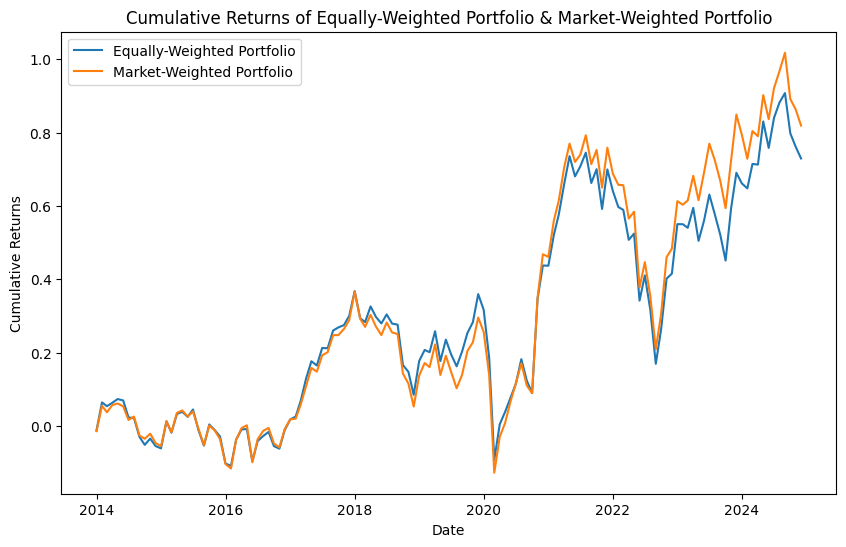

In [34]:
ew_cum =((1+ew).cumprod())-1
mw_cum = ((1+mw).cumprod())-1

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(ew_cum.index.to_timestamp(), ew_cum, label='Equally-Weighted Portfolio')
plt.plot(mw_cum.index.to_timestamp(),mw_cum, label='Market-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Cumulative Returns of Equally-Weighted Portfolio & Market-Weighted Portfolio')
plt.show()

# Question 3

In [35]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [36]:
ri_m.head()

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00,Country Code
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.56,204.41,205.06,212.47,204.94,192.71,199.63,200.28,240.26,AT
5,FLUGHAFEN WIEN,AT00000VIE62,147.79,156.25,153.83,158.62,137.27,148.95,159.68,151.08,...,1996.86,2090.26,2127.00,2320.32,2185.23,2200.73,2173.39,2114.91,2123.14,AT
6,RAIFFEISEN BANK INTL.,AT0000606306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.37,70.38,78.90,80.27,80.70,72.48,78.94,82.80,92.42,AT
7,ERSTE GROUP BANK,AT0000652011,102.94,94.91,97.74,100.50,96.13,97.86,102.06,102.43,...,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69,AT
8,TELEKOM AUSTRIA,AT0000720008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294.09,311.40,300.32,319.06,318.44,268.58,268.82,267.24,271.32,AT


In [37]:
merge_df.columns

Index(['NAME', 'ISIN', '2013_scope1', '2014_scope1', '2015_scope1',
       '2016_scope1', '2017_scope1', '2018_scope1', '2019_scope1',
       '2020_scope1', '2021_scope1', '2022_scope1', '2023_scope1',
       'Country Code', '2013_scope2', '2014_scope2', '2015_scope2',
       '2016_scope2', '2017_scope2', '2018_scope2', '2019_scope2',
       '2020_scope2', '2021_scope2', '2022_scope2', '2023_scope2'],
      dtype='object')

In [38]:
##filter ri_m for companies w available S1 & S2 data 
isin_list = merge_df['ISIN'].unique()
ri_m_filtered = ri_m[ri_m['ISIN'].isin(isin_list)]


In [39]:
##filter ri_m for right timeframe

# Identify and filter the date-like columns
non_date_cols = ['NAME', 'ISIN', 'Country Code']
date_cols = [col for col in ri_m_filtered.columns if col not in non_date_cols]
date_cols_dt = pd.to_datetime(date_cols, errors='coerce')  # Convert valid ones

# Filter only the dates within the 2013-2023 range
filtered_dates = [col for col, dt in zip(date_cols, date_cols_dt) if dt and (dt.year >= 2013 and dt.year <= 2023)]
ri_m_filtered = ri_m_filtered[non_date_cols + filtered_dates]

In [40]:
ri_m_filtered

,NAME,ISIN,Country Code,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-29 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-28 00:00:00,2013-07-31 00:00:00,...,2023-03-31 00:00:00,2023-04-28 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-29 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-29 00:00:00
6,RAIFFEISEN BANK INTL.,AT0000606306,AT,124.66,105.21,94.60,98.15,95.06,80.90,89.05,...,55.38,55.28,52.58,57.02,58.42,51.76,52.63,52.01,63.26,78.15
7,ERSTE GROUP BANK,AT0000652011,AT,426.41,408.87,353.66,397.69,418.03,343.04,392.19,...,538.24,590.14,557.24,604.53,654.51,617.86,599.97,615.96,699.13,700.60
8,TELEKOM AUSTRIA,AT0000720008,AT,137.19,122.61,121.83,127.21,127.03,118.31,129.83,...,193.08,199.86,185.92,198.20,204.43,201.24,217.83,217.47,247.28,263.45
9,ANDRITZ,AT0000730007,AT,3405.46,3653.58,3558.55,3453.89,2882.14,2713.31,2850.90,...,4741.82,4551.50,3745.60,3901.79,3712.05,3731.64,3546.70,3213.62,3803.37,4364.70
10,OMV,AT0000743059,AT,2536.78,2683.07,2622.29,2895.16,2942.66,2864.55,2805.29,...,4260.30,4388.46,4123.18,4439.20,4735.56,4862.86,5026.46,4579.76,4474.83,4602.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,BILLERUD AKTIEBOLAG,SE0000862997,SE,53.99,51.53,48.90,50.13,49.75,49.11,48.96,...,75.65,70.60,62.21,60.60,68.24,65.35,74.51,73.99,78.08,81.15
1696,NOBIA,SE0000949331,SE,30.68,28.25,26.99,29.34,29.50,29.66,37.15,...,12.81,10.88,10.05,9.46,8.07,6.28,5.61,5.54,6.35,8.15
1697,HUSQVARNA B,SE0001662230,SE,14.82,14.22,13.56,13.72,13.62,12.52,14.30,...,26.80,26.94,23.03,28.28,30.78,27.00,24.12,20.69,24.52,26.40
1698,SAS DEAD - DELIST.14/08/24,SE0003366871,SE,1.48,1.57,1.44,1.51,1.51,1.32,1.38,...,0.10,0.07,0.09,0.09,0.09,0.09,0.06,0.01,0.01,0.01


In [41]:
#ensure the columns are numeric
ri_m_filtered = ri_m_filtered.apply(pd.to_numeric, errors='coerce')

#compute monthly percentage change 
returns = ri_m_filtered.pct_change(axis=1).dropna(axis=1)
returns

/tmp/ipykernel_52/3100631514.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = ri_m_filtered.pct_change(axis=1).dropna(axis=1)


,2013-02-28,2013-03-29,2013-04-30,2013-05-31,2013-06-28,2013-07-31,2013-08-30,2013-09-30,2013-10-31,2013-11-29,...,2023-03-31,2023-04-28,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-29,2023-10-31,2023-11-30,2023-12-29
6,-0.156024,-0.100846,0.037526,-0.031482,-0.148959,0.100742,0.128355,-0.043392,0.123908,0.003055,...,-0.081744,-0.001806,-0.048842,0.084443,0.024553,-0.114002,0.016808,-0.011780,0.216305,0.235378
7,-0.041134,-0.135031,0.124498,0.051145,-0.179389,0.143278,0.054999,-0.011263,0.116744,-0.001007,...,-0.159552,0.096425,-0.055749,0.084865,0.082676,-0.055996,-0.028955,0.026651,0.135025,0.002103
8,-0.106276,-0.006362,0.044160,-0.001415,-0.068645,0.097371,0.033890,0.169709,-0.016942,0.033042,...,0.008567,0.035115,-0.069749,0.066050,0.031433,-0.015604,0.082439,-0.001653,0.137076,0.065391
9,0.072859,-0.026010,-0.029411,-0.165538,-0.058578,0.050709,0.021193,0.069807,0.048582,0.030087,...,0.128811,-0.040136,-0.177063,0.041700,-0.048629,0.005277,-0.049560,-0.093913,0.183516,0.147588
10,0.057668,-0.022653,0.104058,0.016407,-0.026544,-0.020687,0.042734,0.072744,-0.032961,0.027289,...,-0.061027,0.030082,-0.060449,0.076645,0.066760,0.026882,0.033643,-0.088870,-0.022912,0.028517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.045564,-0.051038,0.025153,-0.007580,-0.012864,-0.003054,-0.031658,0.113478,0.164804,0.033501,...,-0.114791,-0.066755,-0.118839,-0.025880,0.126073,-0.042351,0.140168,-0.006979,0.055278,0.039319
1696,-0.079205,-0.044602,0.087069,0.005453,0.005424,0.252529,0.082369,0.023626,0.088921,-0.005578,...,0.013449,-0.150664,-0.076287,-0.058706,-0.146934,-0.221809,-0.106688,-0.012478,0.146209,0.283465
1697,-0.040486,-0.046414,0.011799,-0.007289,-0.080764,0.142173,0.049650,0.033311,-0.092843,0.022033,...,-0.027576,0.005224,-0.145137,0.227964,0.088402,-0.122807,-0.106667,-0.142206,0.185114,0.076672
1698,0.060811,-0.082803,0.048611,0.000000,-0.125828,0.045455,-0.050725,0.870229,-0.146939,-0.062201,...,-0.090909,-0.300000,0.285714,0.000000,0.000000,0.000000,-0.333333,-0.833333,0.000000,0.000000


In [42]:
#compute expected returns
expected_returns = returns.mean(axis=1)
expected_returns

6       0.003386
7       0.009374
8       0.006716
9       0.005547
10      0.009153
          ...   
1695    0.005892
1696   -0.003703
1697    0.009194
1698   -0.014533
1699    0.005673
Length: 468, dtype: float64

In [43]:
#check expected returns
print("Expected Returns", expected_returns)
print("Any NaNs in exp returns?", np.isnan(expected_returns).any())
print("Any infinite values in exp returns?", np.isinf(expected_returns).any())

Expected Returns 6       0.003386
7       0.009374
8       0.006716
9       0.005547
10      0.009153
          ...   
1695    0.005892
1696   -0.003703
1697    0.009194
1698   -0.014533
1699    0.005673
Length: 468, dtype: float64
Any NaNs in exp returns? False
Any infinite values in exp returns? False


In [44]:
#compute covariance matrix
cov_matrix = returns.T.cov()
cov_matrix

,6,7,8,9,10,12,13,14,15,98,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
6,0.013546,0.008796,0.003378,0.004991,0.006769,0.005866,0.004481,0.006426,0.002821,0.005626,...,0.004196,0.006416,0.001904,0.004338,0.005074,0.002899,0.005139,0.005282,0.001947,0.002416
7,0.008796,0.010637,0.002319,0.003960,0.006448,0.005561,0.004510,0.005191,0.002617,0.005416,...,0.003815,0.005374,0.001984,0.004513,0.005277,0.002294,0.005479,0.005330,0.002332,0.001869
8,0.003378,0.002319,0.003511,0.001834,0.002135,0.002404,0.001855,0.002657,0.001152,0.002222,...,0.002138,0.001966,0.001326,0.001981,0.002882,0.000964,0.002422,0.002203,0.002555,0.001765
9,0.004991,0.003960,0.001834,0.007336,0.003846,0.004320,0.002864,0.004353,0.001670,0.004329,...,0.002570,0.004548,0.001344,0.004138,0.004066,0.002143,0.004493,0.003818,0.002659,0.001447
10,0.006769,0.006448,0.002135,0.003846,0.009457,0.003987,0.003663,0.004330,0.002373,0.005163,...,0.002196,0.004639,0.001654,0.003497,0.003250,0.001982,0.003829,0.003660,0.003933,0.001730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.002899,0.002294,0.000964,0.002143,0.001982,0.003195,0.001697,0.002618,0.001637,0.002408,...,0.002514,0.002819,0.001009,0.002300,0.003330,0.005664,0.003440,0.003552,0.002306,0.001182
1696,0.005139,0.005479,0.002422,0.004493,0.003829,0.005783,0.002887,0.004616,0.003066,0.003715,...,0.004506,0.003848,0.002397,0.004257,0.007380,0.003440,0.012260,0.006313,0.005520,0.002681
1697,0.005282,0.005330,0.002203,0.003818,0.003660,0.006294,0.003285,0.006103,0.003128,0.004225,...,0.003890,0.005419,0.001836,0.004326,0.006740,0.003552,0.006313,0.009822,0.004207,0.002047
1698,0.001947,0.002332,0.002555,0.002659,0.003933,0.005703,0.001797,0.003992,0.002977,0.003926,...,0.004039,0.002973,0.001190,0.002856,0.004765,0.002306,0.005520,0.004207,0.040705,0.001761


In [45]:
#check for NaNs
cov_matrix = np.nan_to_num(cov_matrix, nan=0.0, posinf=1e6, neginf=-1e6) #remove NaNs
print("Covariance Matrix:\n", cov_matrix)
print("Any NaNs in covariance matrix?", np.isnan(cov_matrix).any())
print("Any infinite values in covariance matrix?", np.isinf(cov_matrix).any())

Covariance Matrix:
 [[0.01354552 0.00879617 0.00337838 ... 0.00528232 0.00194676 0.00241616]
 [0.00879617 0.01063687 0.00231948 ... 0.00533042 0.00233214 0.00186913]
 [0.00337838 0.00231948 0.00351134 ... 0.00220336 0.00255536 0.00176536]
 ...
 [0.00528232 0.00533042 0.00220336 ... 0.00982224 0.0042069  0.00204654]
 [0.00194676 0.00233214 0.00255536 ... 0.0042069  0.04070546 0.00176144]
 [0.00241616 0.00186913 0.00176536 ... 0.00204654 0.00176144 0.00403505]]
Any NaNs in covariance matrix? False
Any infinite values in covariance matrix? False


In [46]:
#checking for neg values 
eigenvalues = np.linalg.eigvals(cov_matrix)
print("Eigenvalues of Covariance Matrix:", eigenvalues)
print("Any negative eigenvalues?", any(eigenvalues <= 0))

Eigenvalues of Covariance Matrix: [ 1.59927332e+00+0.00000000e+00j  1.93331427e-01+0.00000000e+00j
  1.38008343e-01+0.00000000e+00j  1.15163303e-01+0.00000000e+00j
  9.57850469e-02+0.00000000e+00j  8.65440695e-02+0.00000000e+00j
  8.00932230e-02+0.00000000e+00j  7.36121686e-02+0.00000000e+00j
  7.21105982e-02+0.00000000e+00j  6.49546964e-02+0.00000000e+00j
  6.01889234e-02+0.00000000e+00j  5.98117573e-02+0.00000000e+00j
  5.51017122e-02+0.00000000e+00j  5.13479690e-02+0.00000000e+00j
  4.85232123e-02+0.00000000e+00j  4.77364515e-02+0.00000000e+00j
  4.47355972e-02+0.00000000e+00j  4.29865013e-02+0.00000000e+00j
  4.14050441e-02+0.00000000e+00j  4.00401979e-02+0.00000000e+00j
  3.90037230e-02+0.00000000e+00j  3.78754636e-02+0.00000000e+00j
  3.76167635e-02+0.00000000e+00j  3.58989934e-02+0.00000000e+00j
  3.44873596e-02+0.00000000e+00j  3.42162498e-02+0.00000000e+00j
  3.31431141e-02+0.00000000e+00j  3.14063041e-02+0.00000000e+00j
  3.04602616e-02+0.00000000e+00j  2.99506151e-02+0.00000

In [47]:
## Constructing the MVP

def min_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)
    init_guess = np.ones(num_assets) / num_assets  #equal weights
    bounds = [(0, 1)] * num_assets  # const 1: o short selling
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # const 2: sum of weights = 1

    def portfolio_volatility(weights):
        return np.sqrt(weights.T @ cov_matrix @ weights)

    result = sco.minimize(portfolio_volatility, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  #optimal weights

min_var_weights = min_variance_portfolio(cov_matrix)
min_var_return = np.dot(min_var_weights, expected_returns)
min_var_volatility = np.sqrt(min_var_weights.T @ cov_matrix @ min_var_weights)

In [48]:
#checking MVP weights & constraints
print(f"Sum of MVP weights: {np.sum(min_var_weights)}")  #should be very close to 1
print("MVP Weights:", min_var_weights)
print("Any negative weights?", np.any(min_var_weights < 0))  #should be false
print("Any weights greater than 1?", np.any(min_var_weights > 1))  #should be false

Sum of MVP weights: 1.000000000000007
MVP Weights: [5.22981683e-17 1.19082334e-16 9.09991818e-17 0.00000000e+00
 3.50158220e-17 0.00000000e+00 0.00000000e+00 9.70793871e-17
 9.81004013e-17 5.37598257e-18 0.00000000e+00 9.06764961e-17
 1.07440110e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.61897380e-17 9.10436360e-17 7.67488529e-02 2.21601573e-17
 0.00000000e+00 4.85325875e-17 6.55079025e-17 3.10915583e-02
 0.00000000e+00 6.44932377e-17 4.46419417e-17 0.00000000e+00
 3.22584022e-17 1.65944357e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.75716705e-17 0.00000000e+00 4.80952551e-17
 4.41030961e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.66824661e-03 4.30238922e-17 3.63326786e-02 1.81656281e-03
 0.00000000e+00 9.21738251e-18 7.92927605e-17 5.61062617e-17
 1.97608808e-17 0.00000000e+00 3.54639502e-02 1.10064478e-16
 2.39900632e-17 0.00000000e+00 4.95250972e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0

In [49]:
## Constructing the MRP

def max_return_portfolio(expected_returns, cov_matrix):
    num_assets = len(expected_returns)
    init_guess = np.ones(num_assets) / num_assets  # Equal weights initial guess
    bounds = [(0, 1)] * num_assets  # No short selling constraint
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1

    # Objective function: Negative expected return (since we minimize in scipy)
    def negative_portfolio_return(weights):
        return -np.dot(weights, expected_returns)

    result = sco.minimize(negative_portfolio_return, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  # Optimal weights


max_ret_weights = max_return_portfolio(expected_returns, cov_matrix)
max_ret_return = np.dot(max_ret_weights, expected_returns)
max_ret_volatility = np.sqrt(max_ret_weights.T @ cov_matrix @ max_ret_weights)


In [50]:
#checking MRP weights & constraints
print(f"Sum of MRP Weights: {sum(max_ret_weights):.6f}")  #should be very close to 1
print(f"Are all MRP weights non-negative? {np.all(max_ret_weights >= 0)}")  #should be true
print(f"Any NaNs in MRP weights? {np.isnan(max_ret_weights).any()}")
print(f"Any infinities in MRP weights? {np.isinf(max_ret_weights).any()}")

print("MRP weights:", max_ret_weights)

Sum of MRP Weights: 1.000000
Are all MRP weights non-negative? True
Any NaNs in MRP weights? False
Any infinities in MRP weights? False
MRP weights: [0.00000000e+00 0.00000000e+00 3.71883797e-16 1.08590306e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.31556678e-17 0.00000000e+00 2.96378210e-17
 6.60865724e-17 6.17174285e-20 1.07217073e-16 0.00000000e+00
 0.00000000e+00 9.63477194e-18 0.00000000e+00 0.00000000e+00
 1.00918036e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.84361221e-17 0.00000000e+00 9.33350104e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.98993560e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.32075462e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31492073e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.53109772e-15
 4.70943372e-17 1.98400438e-17 0.00000000e+00 0.00000000e+00
 5.86282741e-17 7.85999759e-17 0.00000000e+00 0.00000000e+

In [51]:
#checking expected return 
print(f"MRP Expected Return: {max_ret_return:.6f}")
print(f"MVP Expected Return: {min_var_return:.6f}")
print(f"Does MRP have a higher return than MVP? {max_ret_return > min_var_return}")  #should be true

MRP Expected Return: 0.030923
MVP Expected Return: 0.005417
Does MRP have a higher return than MVP? True


In [52]:
## Constructing the Efficient Frontier
num_portfolios = 20
def efficient_frontier(expected_returns, cov_matrix, min_var_return, max_ret_return, num_portfolios):
    num_assets = len(cov_matrix)
    
    def portfolio_volatility(weights, cov_matrix):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    def constraints(target_return, expected_returns, num_assets):
        return (
            {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target_return},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            *({'type': 'ineq', 'fun': lambda x: x[i]} for i in range(num_assets))
        )
    
    target_returns = np.linspace(min_var_return, max_ret_return, num_portfolios)
    
    volatilities = []
    returns = []
    weights_list = []
    
    for target_return in target_returns:
        init_guess = np.ones(num_assets) / num_assets
        
        result = sco.minimize(portfolio_volatility, init_guess, args=(cov_matrix,),
                              method="SLSQP", constraints=constraints(target_return, expected_returns, num_assets),
                              bounds=[(0, 1)] * num_assets)
        
        if result.success:
            optimal_weights = result.x
            volatilities.append(portfolio_volatility(optimal_weights, cov_matrix))
            returns.append(np.dot(optimal_weights, expected_returns))
            weights_list.append(optimal_weights)
        else:
            print(f"Optimization failed for target return {target_return}")

    return returns, volatilities, weights_list

# Calculate efficient frontier
target_step = 0.005
returns, volatilities, weights_list = efficient_frontier(expected_returns, cov_matrix, min_var_return, max_ret_return, num_portfolios)



In [53]:
#define MVP 
mvp_index = np.argmin(volatilities)
mvp_return = returns[mvp_index]
mvp_volatility = volatilities[mvp_index]

#define MRP
mrp_index = np.argmax(returns)
mrp_return = returns[mrp_index]
mrp_volatility = volatilities[mrp_index]

In [54]:
# Initialize lists to store annualized returns and volatilities
annualized_returns = []
annualized_volatilities = []

# Loop through each portfolio in the efficient frontier
for i in range(num_portfolios):
    # Annualize the return and volatility
    annualized_return = returns[i] * 12
    annualized_volatility = volatilities[i] * np.sqrt(12)
    
    # Append to the lists
    annualized_returns.append(annualized_return)
    annualized_volatilities.append(annualized_volatility)

# Create a DataFrame to store the results
portfolios_df = pd.DataFrame({
    'Annualized Return': annualized_returns,
    'Annualized Volatility': annualized_volatilities
})

# Display the DataFrame
portfolios_df


,Annualized Return,Annualized Volatility
0,0.065004,0.091736
1,0.081113,0.092209
2,0.097222,0.093677
3,0.113331,0.096232
4,0.129439,0.099818
5,0.145548,0.104404
6,0.161657,0.109992
7,0.177766,0.116409
8,0.193875,0.123620
9,0.209984,0.131603


In [55]:
# Compute the Sharpe ratio for each portfolio
portfolios_df['Sharpe Ratio'] = (portfolios_df['Annualized Return'] - avg_rf_rate) / portfolios_df['Annualized Volatility']

# Display the updated DataFrame
portfolios_df

,Annualized Return,Annualized Volatility,Sharpe Ratio
0,0.065004,0.091736,-0.897462
1,0.081113,0.092209,-0.718155
2,0.097222,0.093677,-0.534939
3,0.113331,0.096232,-0.353342
4,0.129439,0.099818,-0.179264
5,0.145548,0.104404,-0.017097
6,0.161657,0.109992,0.130227
7,0.177766,0.116409,0.261429
8,0.193875,0.123620,0.376491
9,0.209984,0.131603,0.476058


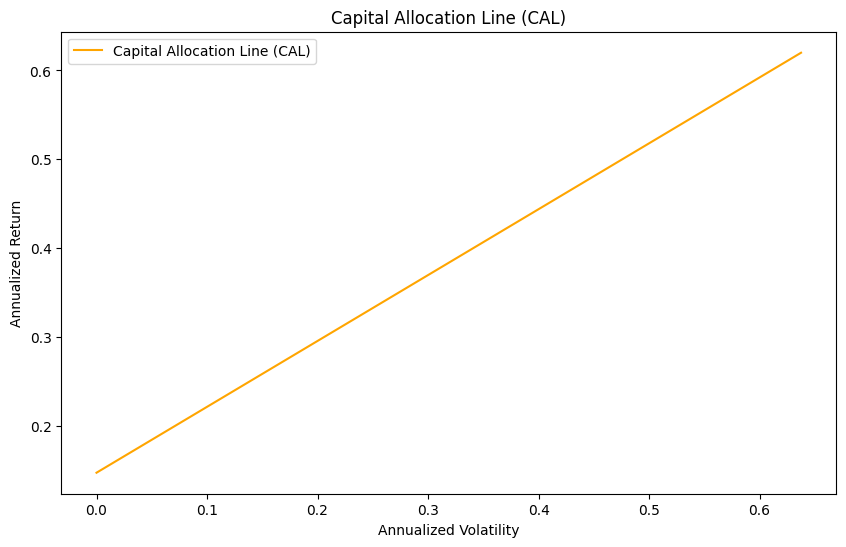

In [56]:
## constructing the Capital Alloccation Line
# Calculate the Sharpe ratio for the portfolio with the highest Sharpe ratio
max_sharpe_ratio = portfolios_df['Sharpe Ratio'].max()

# Define a range of standard deviations for the CAL
std_dev_range = np.linspace(0, portfolios_df['Annualized Volatility'].max() * 1.5, 100)

# Calculate the expected returns for the CAL
cal_returns = avg_rf_rate + max_sharpe_ratio * std_dev_range

# Plot the CAL
plt.figure(figsize=(10, 6))
plt.plot(std_dev_range, cal_returns, label='Capital Allocation Line (CAL)', color='orange')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Capital Allocation Line (CAL)')
plt.legend()
plt.show()

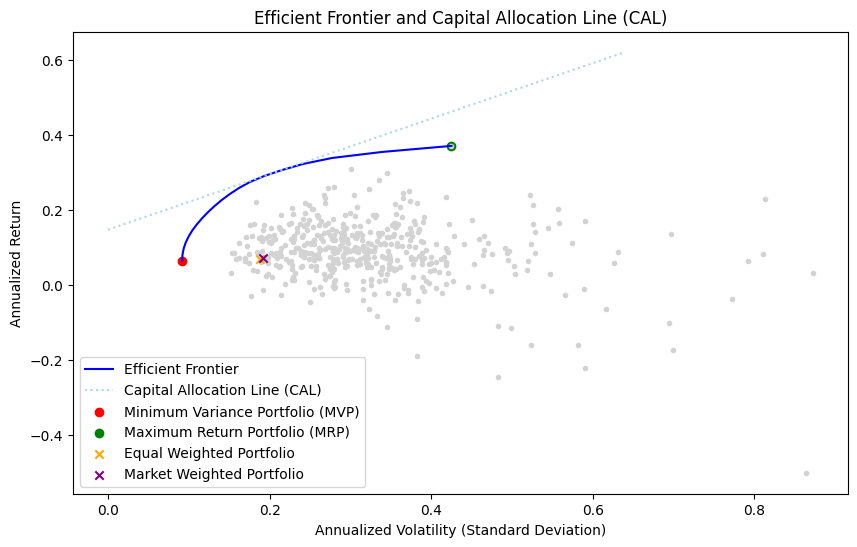

In [57]:
# Compute statistics for both portfolios
stats_ew = compute_annualized_stats(portfolio_returns["R_ew"])
stats_vw = compute_annualized_stats(portfolio_returns["R_vw"])

# Extract computed values
equal_weighted_return, equal_weighted_volatility = stats_ew[0], stats_ew[1]
mw_weighted_return, mw_weighted_volatility = stats_vw[0], stats_vw[1]

# Plotting efficient frontier with annualized values and CAL line
plt.figure(figsize=(10, 6))
plt.plot(annualized_volatilities, annualized_returns, label='Efficient Frontier', color='blue')
plt.plot(std_dev_range, cal_returns, label='Capital Allocation Line (CAL)', color='lightblue', linestyle=':')
plt.scatter(mvp_volatility * np.sqrt(12), mvp_return * 12, color='red', marker='o', label='Minimum Variance Portfolio (MVP)')
plt.scatter(mrp_volatility * np.sqrt(12), mrp_return * 12, color='green', marker='o', label='Maximum Return Portfolio (MRP)')

# Plot individual assets
for i in range(len(expected_returns)):
    plt.scatter(np.sqrt(cov_matrix[i, i]) * np.sqrt(12), expected_returns.iloc[i] * 12, color='lightgrey', marker='.')

# Plot the two portfolios using computed values
plt.scatter(equal_weighted_volatility, equal_weighted_return, color='orange', marker='x', label='Equal Weighted Portfolio')
plt.scatter(mw_weighted_volatility, mw_weighted_return, color='purple', marker='x', label='Market Weighted Portfolio')

plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier and Capital Allocation Line (CAL)')
plt.legend()
plt.show()


In [58]:
## creation of ex-post performance for each portfolio

#match shape & dimensions
weights_list = np.array(weights_list)
weights_list = weights_list.T 

#compute portfolio ex-post returns
portfolio_ex_post_returns = np.dot(ri_m_filtered.T, weights_list)  

#convert to df
portfolio_ex_post_returns_df = pd.DataFrame(portfolio_ex_post_returns, 
                                            index=ri_m_filtered.columns, 
                                            columns=[f"Portfolio_{i+1}" for i in range(20)])  

print("Portfolio Ex-post Returns DataFrame:")
print(portfolio_ex_post_returns_df.shape) 
portfolio_ex_post_returns_df.head()


Portfolio Ex-post Returns DataFrame:
(135, 20)


,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Portfolio_9,Portfolio_10,Portfolio_11,Portfolio_12,Portfolio_13,Portfolio_14,Portfolio_15,Portfolio_16,Portfolio_17,Portfolio_18,Portfolio_19,Portfolio_20
NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 00:00:00,5786.222828,5321.802254,4849.135567,4536.81307,4216.373326,3783.268937,3507.438361,4059.055731,4763.523654,5432.953982,6234.491407,7073.055204,7967.288454,8573.835091,8410.271892,7932.944839,7834.989067,4919.340733,1407.537028,1764.920001
2013-02-28 00:00:00,5721.574192,5278.674455,4823.347372,4518.98638,4208.839037,3780.391264,3481.181298,4008.617462,4691.491667,5338.498286,6117.532185,6935.566949,7807.553451,8390.616463,8215.902101,7732.668229,7617.931680,4770.955159,1347.903414,1683.330001


In [59]:
# Print or inspect the efficient frontier weights
print("Efficient Frontier Weights (for each portfolio):")
print(weights_list)

Efficient Frontier Weights (for each portfolio):
[[2.69329439e-17 4.85131811e-17 5.01319273e-17 ... 7.64578387e-17
  2.78550690e-16 2.76014100e-13]
 [0.00000000e+00 0.00000000e+00 4.00350679e-17 ... 0.00000000e+00
  5.52980492e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.05862887e-17]
 ...
 [1.82159001e-17 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.75400655e-18 1.96049875e-17 ... 1.29119804e-16
  0.00000000e+00 3.23652844e-13]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.22096823e-17
  2.70353583e-16 0.00000000e+00]]


In [60]:
# Convert the dataframe to percentage returns
portfolio_ex_post_returns_df_pct = portfolio_ex_post_returns_df.iloc[3:].pct_change()

# Drop the first row of returns since it will be NaN after pct_change()
portfolio_ex_post_returns_df_pct = portfolio_ex_post_returns_df_pct.dropna()

# Display transformed dataframe
print(portfolio_ex_post_returns_df_pct)


            Portfolio_1  Portfolio_2  Portfolio_3  Portfolio_4  Portfolio_5  \
2013-02-28    -0.011173    -0.008104    -0.005318    -0.003929    -0.001787   
2013-03-29     0.003158     0.005347     0.014792     0.026489     0.039647   
2013-04-30     0.043195     0.041285     0.040839     0.040567     0.041432   
2013-05-31     0.015305     0.016415     0.014873     0.012088     0.007838   
2013-06-28     0.003397     0.000442    -0.004756    -0.009704    -0.013565   
...                 ...          ...          ...          ...          ...   
2023-08-31    -0.018163    -0.027537    -0.033753    -0.035684    -0.035653   
2023-09-29     0.055424     0.023931     0.004259    -0.002021    -0.002321   
2023-10-31    -0.009865    -0.006669     0.012683     0.026032     0.035138   
2023-11-30     0.037524     0.051147     0.065379     0.072127     0.075391   
2023-12-29     0.050088     0.044081     0.037326     0.034399     0.033245   

            Portfolio_6  Portfolio_7  Portfolio_8  

In [61]:
###ex-post perf analysis 
# Assuming risk-free rate is 0% (modify if needed)
risk_free_rate_annual = 0.00

#annnualize returns
annualized_return = ((1 + portfolio_ex_post_returns_df_pct.mean()) ** 12) - 1
annualized_return

Portfolio_1     0.028010
Portfolio_2     0.045166
Portfolio_3     0.089166
Portfolio_4     0.126883
Portfolio_5     0.160673
Portfolio_6     0.195268
Portfolio_7     0.221889
Portfolio_8     0.236949
Portfolio_9     0.245815
Portfolio_10    0.252462
Portfolio_11    0.259642
Portfolio_12    0.266268
Portfolio_13    0.272173
Portfolio_14    0.283470
Portfolio_15    0.298826
Portfolio_16    0.317922
Portfolio_17    0.337663
Portfolio_18    0.339955
Portfolio_19    0.420603
Portfolio_20    0.441164
dtype: float64

In [62]:
#annualized volatility
annualized_volatility = portfolio_ex_post_returns_df_pct.std() * np.sqrt(12)
annualized_volatility

Portfolio_1     0.136149
Portfolio_2     0.130243
Portfolio_3     0.124435
Portfolio_4     0.128878
Portfolio_5     0.137980
Portfolio_6     0.150044
Portfolio_7     0.161828
Portfolio_8     0.164270
Portfolio_9     0.171614
Portfolio_10    0.179066
Portfolio_11    0.189261
Portfolio_12    0.198761
Portfolio_13    0.208425
Portfolio_14    0.228781
Portfolio_15    0.255346
Portfolio_16    0.286528
Portfolio_17    0.316859
Portfolio_18    0.300370
Portfolio_19    0.389168
Portfolio_20    0.424994
dtype: float64

In [63]:
#sharpe ratio (assuming risk-free rate is 0%)
sharpe_ratio = (annualized_return - risk_free_rate_annual) / annualized_volatility
sharpe_ratio

Portfolio_1     0.205733
Portfolio_2     0.346787
Portfolio_3     0.716565
Portfolio_4     0.984520
Portfolio_5     1.164462
Portfolio_6     1.301405
Portfolio_7     1.371139
Portfolio_8     1.442431
Portfolio_9     1.432371
Portfolio_10    1.409880
Portfolio_11    1.371876
Portfolio_12    1.339636
Portfolio_13    1.305856
Portfolio_14    1.239047
Portfolio_15    1.170278
Portfolio_16    1.109567
Portfolio_17    1.065657
Portfolio_18    1.131787
Portfolio_19    1.080775
Portfolio_20    1.038048
dtype: float64

In [64]:
# Create a DataFrame to compile the ex-post performances
ex_post_performance_df = pd.DataFrame({
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

# Display the DataFrame
ex_post_performance_df

,Annualized Return,Annualized Volatility,Sharpe Ratio
Portfolio_1,0.028010,0.136149,0.205733
Portfolio_2,0.045166,0.130243,0.346787
Portfolio_3,0.089166,0.124435,0.716565
Portfolio_4,0.126883,0.128878,0.984520
Portfolio_5,0.160673,0.137980,1.164462
Portfolio_6,0.195268,0.150044,1.301405
Portfolio_7,0.221889,0.161828,1.371139
Portfolio_8,0.236949,0.164270,1.442431
Portfolio_9,0.245815,0.171614,1.432371
Portfolio_10,0.252462,0.179066,1.409880


In [65]:
##Computation of Ex-Ante Sharpe Ratio


#create the dataframe to match ex-ante timeframe
##filter ri_m for companies w available S1 & S2 data 
isin_list = merge_df['ISIN'].unique()
ri_m_ex_ante = ri_m[ri_m['ISIN'].isin(isin_list)]

# Identify and filter the date-like columns
non_date_cols = ['NAME', 'ISIN', 'Country Code']
date_cols = [col for col in ri_m_ex_ante.columns if col not in non_date_cols]
date_cols_dt = pd.to_datetime(date_cols, errors='coerce')  # Convert valid ones

# Filter only the dates within the 2003-2013 range
filtered_dates = [col for col, dt in zip(date_cols, date_cols_dt) if dt and (dt.year >= 2003 and dt.year <= 2013)]
ri_m_ex_ante = ri_m_ex_ante[non_date_cols + filtered_dates]
ri_m_ex_ante = ri_m_ex_ante.drop(columns=['NAME', 'ISIN', 'Country Code'])
ri_m_ex_ante.dropna(how='all', inplace=True)
ri_m_ex_ante

,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-30,2003-06-30,2003-07-31,2003-08-29,2003-09-30,2003-10-31,...,2013-03-29,2013-04-30,2013-05-31,2013-06-28,2013-07-31,2013-08-30,2013-09-30,2013-10-31,2013-11-29,2013-12-31
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.60,98.15,95.06,80.90,89.05,100.48,96.12,108.03,108.36,103.64
7,168.64,168.51,179.67,199.20,216.88,226.34,224.57,235.92,259.05,283.18,...,353.66,397.69,418.03,343.04,392.19,413.76,409.10,456.86,456.40,451.57
8,125.30,128.84,125.37,125.21,134.54,138.68,134.13,127.61,129.52,129.86,...,121.83,127.21,127.03,118.31,129.83,134.23,157.01,154.35,159.45,141.93
9,116.32,120.82,121.08,130.65,144.02,137.92,142.17,148.82,165.93,165.64,...,3558.55,3453.89,2882.14,2713.31,2850.90,2911.32,3114.55,3265.86,3364.12,3326.34
10,461.79,489.54,489.33,544.02,529.21,563.16,532.84,550.68,561.14,599.38,...,2622.29,2895.16,2942.66,2864.55,2805.29,2925.17,3137.96,3034.53,3117.34,3044.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,20.43,22.12,22.75,24.96,24.86,23.37,22.66,25.13,26.00,28.73,...,48.90,50.13,49.75,49.11,48.96,47.41,52.79,61.49,63.55,66.14
1696,8.18,9.77,9.30,10.22,10.38,10.99,10.71,10.96,11.85,11.84,...,26.99,29.34,29.50,29.66,37.15,40.21,41.16,44.82,44.57,43.56
1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.56,13.72,13.62,12.52,14.30,15.01,15.51,14.07,14.38,14.40
1698,7.18,5.16,5.90,6.66,7.23,7.64,7.82,11.13,11.31,12.20,...,1.44,1.51,1.51,1.32,1.38,1.31,2.45,2.09,1.96,1.79


In [66]:
#compute pct change (returns)
returns_ex_ante = ri_m_ex_ante.pct_change(axis=1)
returns_ex_ante

/tmp/ipykernel_52/142994914.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_ex_ante = ri_m_ex_ante.pct_change(axis=1)


,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-30,2003-06-30,2003-07-31,2003-08-29,2003-09-30,2003-10-31,...,2013-03-29,2013-04-30,2013-05-31,2013-06-28,2013-07-31,2013-08-30,2013-09-30,2013-10-31,2013-11-29,2013-12-31
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.100846,0.037526,-0.031482,-0.148959,0.100742,0.128355,-0.043392,0.123908,0.003055,-0.043559
7,NaN,-0.000771,0.066228,0.108699,0.088755,0.043619,-0.007820,0.050541,0.098042,0.093148,...,-0.135031,0.124498,0.051145,-0.179389,0.143278,0.054999,-0.011263,0.116744,-0.001007,-0.010583
8,NaN,0.028252,-0.026933,-0.001276,0.074515,0.030772,-0.032809,-0.048610,0.014967,0.002625,...,-0.006362,0.044160,-0.001415,-0.068645,0.097371,0.033890,0.169709,-0.016942,0.033042,-0.109878
9,NaN,0.038686,0.002152,0.079039,0.102334,-0.042355,0.030815,0.046775,0.114971,-0.001748,...,-0.026010,-0.029411,-0.165538,-0.058578,0.050709,0.021193,0.069807,0.048582,0.030087,-0.011230
10,NaN,0.060092,-0.000429,0.111765,-0.027223,0.064152,-0.053839,0.033481,0.018995,0.068147,...,-0.022653,0.104058,0.016407,-0.026544,-0.020687,0.042734,0.072744,-0.032961,0.027289,-0.023289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,NaN,0.082721,0.028481,0.097143,-0.004006,-0.059936,-0.030381,0.109003,0.034620,0.105000,...,-0.051038,0.025153,-0.007580,-0.012864,-0.003054,-0.031658,0.113478,0.164804,0.033501,0.040755
1696,NaN,0.194377,-0.048106,0.098925,0.015656,0.058767,-0.025478,0.023343,0.081204,-0.000844,...,-0.044602,0.087069,0.005453,0.005424,0.252529,0.082369,0.023626,0.088921,-0.005578,-0.022661
1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.046414,0.011799,-0.007289,-0.080764,0.142173,0.049650,0.033311,-0.092843,0.022033,0.001391
1698,NaN,-0.281337,0.143411,0.128814,0.085586,0.056708,0.023560,0.423274,0.016173,0.078691,...,-0.082803,0.048611,0.000000,-0.125828,0.045455,-0.050725,0.870229,-0.146939,-0.062201,-0.086735


In [67]:
# Compute expected returns 
expected_returns_ex_ante = returns_ex_ante.mean(axis=1)
expected_returns_ex_ante

6       0.009210
7       0.017022
8       0.004432
9       0.030326
10      0.019673
          ...   
1695    0.018169
1696    0.022945
1697    0.005223
1698    0.004462
1699    0.013368
Length: 468, dtype: float64

In [68]:
# Compute the covariance matrix 
cov_matrix_ex_ante = returns_ex_ante.T.cov()
cov_matrix_ex_ante

,6,7,8,9,10,12,13,14,15,98,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
6,0.020598,0.017885,0.005767,0.007446,0.008832,0.011776,0.010624,0.011212,0.006080,0.008682,...,0.006378,0.009931,0.006375,0.008008,0.010940,0.011490,0.012355,0.010276,0.009328,0.007243
7,0.017885,0.018850,0.004711,0.006007,0.006896,0.011050,0.009507,0.009146,0.005404,0.008545,...,0.005290,0.007815,0.006094,0.006876,0.009284,0.010020,0.011022,0.011811,0.008972,0.006429
8,0.005767,0.004711,0.006900,0.002824,0.004035,0.004288,0.004258,0.004296,0.002558,0.002771,...,0.002563,0.002780,0.003355,0.003320,0.003780,0.001581,0.002823,0.002882,0.004310,0.003737
9,0.007446,0.006007,0.002824,0.008465,0.005556,0.005433,0.004382,0.006569,0.003671,0.004250,...,0.003534,0.005586,0.003506,0.005158,0.007077,0.005270,0.007521,0.005275,0.005434,0.003872
10,0.008832,0.006896,0.004035,0.005556,0.010259,0.005393,0.004780,0.007228,0.004201,0.004185,...,0.003121,0.004624,0.003428,0.004034,0.005788,0.003815,0.005992,0.006398,0.006401,0.004049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.011490,0.010020,0.001581,0.005270,0.003815,0.012227,0.006929,0.010268,0.003290,0.007127,...,0.005746,0.008128,0.002928,0.006260,0.008925,0.023042,0.013433,0.010912,0.005698,0.005184
1696,0.012355,0.011022,0.002823,0.007521,0.005992,0.010327,0.007961,0.009946,0.004444,0.007099,...,0.006373,0.009331,0.005347,0.008014,0.012932,0.013433,0.021151,0.012075,0.010751,0.006028
1697,0.010276,0.011811,0.002882,0.005275,0.006398,0.010179,0.006757,0.009041,0.004197,0.007056,...,0.005267,0.008707,0.003914,0.006389,0.011161,0.010912,0.012075,0.012035,0.009006,0.005007
1698,0.009328,0.008972,0.004310,0.005434,0.006401,0.009728,0.005810,0.007195,0.005454,0.005958,...,0.004808,0.006230,0.004841,0.006042,0.010763,0.005698,0.010751,0.009006,0.032058,0.004482


In [69]:
## Constructing the MVP

def min_variance_portfolio_ex_ante(cov_matrix_ex_ante):
    num_assets = len(cov_matrix_ex_ante)
    init_guess = np.ones(num_assets) / num_assets  #equal weights
    bounds = [(0, 1)] * num_assets  # const 1: o short selling
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # const 2: sum of weights = 1

    def portfolio_volatility_ex_ante(weights):
        return np.sqrt(weights.T @ cov_matrix_ex_ante @ weights)

    result = sco.minimize(portfolio_volatility_ex_ante, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  #optimal weights

min_var_weights_ee = min_variance_portfolio_ex_ante(cov_matrix_ex_ante)
min_var_return_ee = np.dot(min_var_weights_ee, expected_returns_ex_ante)
min_var_volatility_ee = np.sqrt(min_var_weights_ee.T @ cov_matrix_ex_ante @ min_var_weights_ee)

In [70]:
## Constructing the MRP

def max_return_portfolio_ee(expected_returns_ex_ante, cov_matrix_ex_ante):
    num_assets = len(expected_returns_ex_ante)
    init_guess = np.ones(num_assets) / num_assets  # Equal weights initial guess
    bounds = [(0, 1)] * num_assets  # No short selling constraint
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1

    # Objective function: Negative expected return (since we minimize in scipy)
    def negative_portfolio_return_ee(weights):
        return -np.dot(weights, expected_returns_ex_ante)

    result = sco.minimize(negative_portfolio_return_ee, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  # Optimal weights


max_ret_weights_ee = max_return_portfolio_ee(expected_returns_ex_ante, cov_matrix_ex_ante)
max_ret_return_ee = np.dot(max_ret_weights, expected_returns_ex_ante)
max_ret_volatility_ee = np.sqrt(max_ret_weights_ee.T @ cov_matrix_ex_ante @ max_ret_weights_ee)

In [71]:
## Constructing the Efficient Frontier (ex-ante timeframe)
num_portfolios = 20
def efficient_frontier_ee(expected_returns_ex_ante, cov_matrix_ex_ante, min_var_return_ee, max_ret_return_ee, num_portfolios):
    num_assets = len(cov_matrix_ex_ante)
    
    def portfolio_volatility_ee(weights, cov_matrix_ex_ante):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix_ex_ante, weights)))
    
    def constraints(target_return_ee, expected_returns_ex_ante, num_assets):
        return (
            {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns_ex_ante) - target_return_ee},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            *({'type': 'ineq', 'fun': lambda x: x[i]} for i in range(num_assets))
        )
    
    target_returns = np.linspace(min_var_return_ee, max_ret_return_ee, num_portfolios)
    
    volatilities_ee = []
    returns_ee = []
    weights_list_ee = []
    
    for target_return_ee in target_returns:
        init_guess = np.ones(num_assets) / num_assets
        
        result = sco.minimize(portfolio_volatility_ee, init_guess, args=(cov_matrix_ex_ante,),
                              method="SLSQP", constraints=constraints(target_return_ee, expected_returns_ex_ante, num_assets),
                              bounds=[(0, 1)] * num_assets)
        
        if result.success:
            optimal_weights_ee = result.x
            volatilities.append(portfolio_volatility(optimal_weights_ee, cov_matrix_ex_ante))
            returns.append(np.dot(optimal_weights_ee, expected_returns_ex_ante))
            weights_list_ee.append(optimal_weights_ee)
        else:
            print(f"Optimization failed for target return {target_return_ee}")

    return returns_ee, volatilities_ee, weights_list_ee

# Calculate efficient frontier
returns_ee, volatilities_ee, weights_list_ee = efficient_frontier(expected_returns_ex_ante, cov_matrix_ex_ante, min_var_return_ee, max_ret_return_ee, num_portfolios)

In [72]:
#define MVP_ee
mvp_index_ee = np.argmin(volatilities_ee)
mvp_return_ee = returns_ee[mvp_index_ee]
mvp_volatility_ee = volatilities[mvp_index_ee]

#define MRP_ee
mrp_index_ee = np.argmax(returns_ee)
mrp_return_ee = returns_ee[mrp_index_ee]
mrp_volatility_ee = volatilities_ee[mrp_index_ee]

In [73]:
##identify and store ex-ante weights

#match shape & dimensions
weights_list = np.array(weights_list)
weights_list = weights_list.T 
weights_list_ee = np.array(weights_list_ee)

if weights_list_ee.shape[0] != len(ri_m_ex_ante.index):
    weights_list_ee = weights_list_ee.T  # Flip dimensions if needed
    

In [74]:
# Create a DataFrame to store the weights for each portfolio
weights_df = pd.DataFrame(weights_list_ee, index=ri_m_ex_ante.index, columns=[f'Portfolio_{i+1}' for i in range(weights_list_ee.shape[1])])

#compute portfolio ex-post returns
portfolio_ex_ante_returns = np.dot(ri_m_filtered.T, weights_df)  

#convert to df
portfolio_ex_ante_returns_df = pd.DataFrame(portfolio_ex_ante_returns, 
                                            index=ri_m_filtered.columns, 
                                            columns=[f"Portfolio_{i+1}" for i in range(20)])  

print("Portfolio Ex-ante Returns DataFrame:")
print(portfolio_ex_ante_returns_df.shape) 
portfolio_ex_ante_returns_df

Portfolio Ex-ante Returns DataFrame:
(135, 20)


,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Portfolio_9,Portfolio_10,Portfolio_11,Portfolio_12,Portfolio_13,Portfolio_14,Portfolio_15,Portfolio_16,Portfolio_17,Portfolio_18,Portfolio_19,Portfolio_20
NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 00:00:00,14511.854631,14569.969848,14631.370271,14699.739538,14764.215139,14830.300779,14880.248715,14891.300027,14941.335641,14985.181345,15081.652513,16243.421369,17084.685448,17830.966142,19524.513093,21159.067689,23026.765847,24767.468122,26640.732048,29071.771288
2013-02-28 00:00:00,14885.572688,14945.925600,15009.278921,15080.230732,15147.387666,15216.476324,15268.121944,15278.417714,15329.555766,15373.589535,15475.186009,16641.788381,17480.377023,18226.709376,19917.797303,21552.355775,23422.136469,25164.642116,27040.105259,29473.933050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 00:00:00,25000.986911,25089.320156,25197.288734,25331.046350,25452.038797,25598.645799,25693.148355,25693.194691,25786.822528,25818.928004,26057.787705,27465.423668,28317.151388,29143.027979,30966.119993,32793.511393,34916.002159,36920.647666,39081.368917,41826.744180
2023-09-29 00:00:00,24961.395564,25052.680186,25161.437267,25295.688957,25418.685933,25566.052492,25662.280519,25664.493843,25758.210460,25793.419467,26032.146731,27400.641370,28225.708265,29026.839483,30788.787636,32557.044389,34613.444925,36552.734405,38642.679277,41300.009993
2023-10-31 00:00:00,24085.730647,24172.488959,24274.574912,24402.303242,24520.504139,24661.079463,24751.328393,24747.658228,24835.432521,24868.558456,25100.390281,26396.444282,27171.046670,27924.901969,29581.535516,31247.628935,33191.245503,35021.398305,36995.119856,39511.756683
2023-11-30 00:00:00,26111.472486,26204.970336,26315.779391,26454.046554,26580.994451,26733.072092,26830.627047,26827.129469,26922.908464,26957.572470,27208.129007,28593.220974,29416.648191,30221.322713,31988.042025,33766.831860,35842.148804,37799.188420,39909.924830,42597.043003


In [75]:
# Convert the dataframe to percentage returns
portfolio_ex_ante_returns_df_pct = portfolio_ex_ante_returns_df.iloc[3:].pct_change()

# Drop the first row of returns since it will be NaN after pct_change()
portfolio_ex_ante_returns_df_pct = portfolio_ex_ante_returns_df_pct.dropna()

# Display transformed dataframe
print(portfolio_ex_ante_returns_df_pct)

            Portfolio_1  Portfolio_2  Portfolio_3  Portfolio_4  Portfolio_5  \
2013-02-28     0.025753     0.025803     0.025829     0.025884     0.025953   
2013-03-29     0.015703     0.015598     0.015461     0.015339     0.015236   
2013-04-30     0.017551     0.017635     0.017698     0.017742     0.017775   
2013-05-31     0.012187     0.012274     0.012382     0.012462     0.012507   
2013-06-28     0.004706     0.004722     0.004739     0.004755     0.004774   
...                 ...          ...          ...          ...          ...   
2023-08-31    -0.019899    -0.019713    -0.019605    -0.019554    -0.019518   
2023-09-29    -0.001584    -0.001460    -0.001423    -0.001396    -0.001310   
2023-10-31    -0.035081    -0.035134    -0.035247    -0.035318    -0.035335   
2023-11-30     0.084105     0.084082     0.084088     0.084080     0.084031   
2023-12-29     0.069090     0.069148     0.069220     0.069280     0.069350   

            Portfolio_6  Portfolio_7  Portfolio_8  

In [76]:
# Compute the annualized volatility for each portfolio
portfolio_volatility_ex_ante = portfolio_ex_ante_returns_df_pct.std() * np.sqrt(12)

# Display the computed volatilities
portfolio_volatility_ex_ante

Portfolio_1     0.156720
Portfolio_2     0.156639
Portfolio_3     0.156593
Portfolio_4     0.156577
Portfolio_5     0.156547
Portfolio_6     0.156535
Portfolio_7     0.156478
Portfolio_8     0.156337
Portfolio_9     0.156304
Portfolio_10    0.156229
Portfolio_11    0.156255
Portfolio_12    0.152655
Portfolio_13    0.150523
Portfolio_14    0.149278
Portfolio_15    0.147720
Portfolio_16    0.147602
Portfolio_17    0.148494
Portfolio_18    0.149896
Portfolio_19    0.151766
Portfolio_20    0.154538
dtype: float64

In [77]:
# Compute the ex-ante Sharpe ratio for each portfolio
sharpe_ratio_ex_ante = (annualized_return - avg_rf_rate) / portfolio_volatility_ex_ante

# Display the computed Sharpe ratios
sharpe_ratio_ex_ante


Portfolio_1    -0.761376
Portfolio_2    -0.652246
Portfolio_3    -0.371457
Portfolio_4    -0.130607
Portfolio_5     0.085209
Portfolio_6     0.306224
Portfolio_7     0.476457
Portfolio_8     0.573220
Portfolio_9     0.630064
Portfolio_10    0.672916
Portfolio_11    0.718757
Portfolio_12    0.779107
Portfolio_13    0.829376
Portfolio_14    0.911969
Portfolio_15    1.025537
Portfolio_16    1.155738
Portfolio_17    1.281729
Portfolio_18    1.285040
Portfolio_19    1.800600
Portfolio_20    1.901350
dtype: float64

In [78]:
##Comparison of Ex-Ante & Ex-Post Sharpe Ratios

sharpe_ratio_difference = sharpe_ratio - sharpe_ratio_ex_ante
sharpe_ratio_ratio = sharpe_ratio / sharpe_ratio_ex_ante

sharpe_ratio_comparison_df = pd.DataFrame({
    'Ex-Post Sharpe Ratio': sharpe_ratio,
    'Ex-Ante Sharpe Ratio': sharpe_ratio_ex_ante,
    'Absolute Difference': sharpe_ratio_difference,
    'Ratio (Ex-Post / Ex-Ante)': sharpe_ratio_ratio
})
sharpe_ratio_comparison_df

,Ex-Post Sharpe Ratio,Ex-Ante Sharpe Ratio,Absolute Difference,Ratio (Ex-Post / Ex-Ante)
Portfolio_1,0.205733,-0.761376,0.967110,-0.270212
Portfolio_2,0.346787,-0.652246,0.999033,-0.531680
Portfolio_3,0.716565,-0.371457,1.088022,-1.929068
Portfolio_4,0.984520,-0.130607,1.115127,-7.538037
Portfolio_5,1.164462,0.085209,1.079254,13.666010
Portfolio_6,1.301405,0.306224,0.995181,4.249845
Portfolio_7,1.371139,0.476457,0.894682,2.877782
Portfolio_8,1.442431,0.573220,0.869210,2.516364
Portfolio_9,1.432371,0.630064,0.802307,2.273373
Portfolio_10,1.409880,0.672916,0.736964,2.095180


# Question 4

In [79]:
#Getting ri_m with right time frame for rolling window

#Filter ri_m for companies w available S1 & S2 data
isin_list = merge_df['ISIN'].unique()
ri_m_filtered4 = ri_m[ri_m['ISIN'].isin(isin_list)]

#Filter ri_m for right timeframe
# Identify and filter the date-like columns
non_date_cols = ['NAME', 'ISIN', 'Country Code']
date_cols = [col for col in ri_m_filtered4.columns if col not in non_date_cols]
date_cols_dt = pd.to_datetime(date_cols, errors='coerce')  # Convert valid ones
# Count non-NA values for each company across the date columns
ri_m_filtered4['Non-NA Count'] = ri_m_filtered4[date_cols].count(axis=1)

# Filter out companies with less than the expected number of data points (264 months for 2004-2025)
ri_m_filtered4 = ri_m_filtered4[ri_m_filtered4['Non-NA Count'] == len(date_cols)]

# Drop the temporary 'Non-NA Count' column
ri_m_filtered4 = ri_m_filtered4.drop(columns=['Non-NA Count'])

# Display the filtered DataFrame
ri_m_filtered4.head()

# Filter only the dates within the 2014-2025 range
filtered_dates = [col for col, dt in zip(date_cols, date_cols_dt) if dt and (dt.year >= 2004 and dt.year <= 2025)]
ri_m_filtered4 = ri_m_filtered4[non_date_cols + filtered_dates]
ri_m_filtered4.head()

#Calculate the returns
#ensure the columns are numeric
ri_m_filtered4 = ri_m_filtered4.apply(pd.to_numeric, errors='coerce')
ri_m_filtered4

/tmp/ipykernel_52/1160554089.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ri_m_filtered4['Non-NA Count'] = ri_m_filtered4[date_cols].count(axis=1)


,NAME,ISIN,Country Code,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-30 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
7,NaN,NaN,NaN,331.27,357.71,383.36,383.34,400.52,407.22,402.69,...,809.93,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69
10,NaN,NaN,NaN,745.35,755.68,887.04,856.89,843.94,936.85,1054.58,...,5004.65,5258.75,5127.01,4926.84,5128.51,5036.94,4866.52,4711.97,4548.98,4877.34
12,NaN,NaN,NaN,4013.35,4283.95,4503.70,4434.09,4733.26,4866.90,5016.87,...,7929.49,8487.39,7519.51,8033.28,7490.26,7511.65,6814.97,6371.38,6284.08,6657.20
13,NaN,NaN,NaN,287.41,337.33,343.13,340.46,340.97,337.02,332.07,...,683.69,732.45,747.63,736.27,788.61,761.94,726.29,701.73,718.77,769.12
14,NaN,NaN,NaN,254.92,257.06,255.26,244.44,250.65,276.61,276.41,...,1178.95,1279.93,1186.47,1155.64,1103.23,1177.83,933.55,873.40,856.75,949.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,NaN,NaN,NaN,53.08,56.88,60.15,54.60,59.49,60.55,60.92,...,345.12,352.74,347.23,355.30,389.74,417.29,352.83,335.74,310.04,309.63
1691,NaN,NaN,NaN,244.52,232.71,231.64,236.27,257.39,258.76,260.43,...,1446.61,1562.58,1429.97,1458.20,1519.83,1595.93,1392.63,1317.05,1279.57,1482.76
1694,NaN,NaN,NaN,12.67,14.92,15.09,16.55,16.20,16.66,15.50,...,151.19,168.78,163.90,170.21,171.97,175.47,146.82,140.67,132.35,130.56
1698,NaN,NaN,NaN,13.68,12.78,12.16,12.28,12.39,10.60,9.37,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [80]:
#Compute monthly percentage change
returns4 = ri_m_filtered4.pct_change(axis=1).dropna(axis=1)
returns4.head()

# Define constants
rolling_window = 120  # 10 years * 12 months
returns4=returns4.T
# Ensure the dataframe is sorted by date
#returns4 = returns4.sort_index()
returns4.index = pd.to_datetime(returns4.index)
print(returns4.index)
print(type(returns4.index))

DatetimeIndex(['2004-02-27', '2004-03-31', '2004-04-30', '2004-05-31',
               '2004-06-30', '2004-07-30', '2004-08-31', '2004-09-30',
               '2004-10-29', '2004-11-30',
               ...
               '2024-04-30', '2024-05-31', '2024-06-28', '2024-07-31',
               '2024-08-30', '2024-09-30', '2024-10-31', '2024-11-29',
               '2024-12-31', '2025-01-31'],
              dtype='datetime64[ns]', length=252, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
/tmp/ipykernel_52/2580883612.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns4 = ri_m_filtered4.pct_change(axis=1).dropna(axis=1)


In [81]:
# Initialize storage for expected returns and covariance matrices
expected_returns_dict = {}
cov_matrices_dict = {}
all_optimal_weights=[]

# Loop through each year from 2014 to 2024
for year in range(2014, 2024):
    end_date = pd.to_datetime(f"{year}-12-31")  # End of the year Y
    start_date = end_date - pd.DateOffset(months=rolling_window)  # 10 years back

    # Select the rolling window data
    df_window = returns4.loc[start_date:end_date]

    print(len(df_window))

    if len(df_window) < rolling_window:
        print(f"Not enough data for {year}, skipping...")
        continue

    # Compute expected returns 
    expected_returns = df_window.sum(axis=0) / rolling_window  # Explicit sum divided by τ

    # Compute covariance matrix 
    mu_Y_plus_1 = expected_returns.values.reshape(-1, 1)  # Reshape for matrix operations
    deviations = df_window - mu_Y_plus_1.T  # Subtract expected return from each month's return
    cov_matrix = (deviations.T @ deviations) / rolling_window  # Matrix multiplication version

    # Store results
    expected_returns_dict[year] = expected_returns
    cov_matrices_dict[year] = cov_matrix

    print(f"Computed expected returns and covariance matrix for {year}")

    #optimal portfolio allocation

    optimal_weights_dict = {}
    # Define the objective function (portfolio variance)
    def portfolio_variance(weights, cov_matrix):
        return weights.T @ cov_matrix @ weights

    # Constraints: sum of weights = 1
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    # Bounds: No short-selling (weights must be >= 0)
    n_assets = len(expected_returns)
    bounds = [(0, 1) for _ in range(n_assets)]

    # Initial guess: Equal weights
    initial_weights = np.ones(n_assets) / n_assets

    # Solve optimization problem
    result = sco.minimize(portfolio_variance, initial_weights, args=(cov_matrix,),
                          method='SLSQP', bounds=bounds, constraints=constraints)

    # Store optimal weights for this year
    if result.success:
      all_optimal_weights.append(result.x)
      print(f"Optimal weights computed for {year}")
    else:
      print(f"Optimization failed for {year}")

# Convert to DataFrame for easy analysis
df_optimal_weights = pd.DataFrame(all_optimal_weights, index=range(2014, 2024)).T
df_optimal_weights.columns = [str(year) for year in range(2014, 2024)]  # Rename index to years if needed
df_optimal_weights.index = returns4.columns

121
Computed expected returns and covariance matrix for 2014
Optimal weights computed for 2014
120
Computed expected returns and covariance matrix for 2015
Optimal weights computed for 2015
120
Computed expected returns and covariance matrix for 2016
Optimal weights computed for 2016
121
Computed expected returns and covariance matrix for 2017
Optimal weights computed for 2017
121
Computed expected returns and covariance matrix for 2018
Optimal weights computed for 2018
121
Computed expected returns and covariance matrix for 2019
Optimal weights computed for 2019
121
Computed expected returns and covariance matrix for 2020
Optimal weights computed for 2020
120
Computed expected returns and covariance matrix for 2021
Optimal weights computed for 2021
121
Computed expected returns and covariance matrix for 2022
Optimal weights computed for 2022
121
Computed expected returns and covariance matrix for 2023
Optimal weights computed for 2023


In [82]:
#Printing some examples to check values
print("Expected Returns for 2024:\n", expected_returns_dict[2023])
print("Covariance Matrix for 2024:\n", cov_matrices_dict[2023])

Expected Returns for 2024:
 7       0.009210
10      0.008174
12      0.012241
13      0.000787
14      0.003870
          ...   
1690    0.008688
1691    0.009581
1694    0.006061
1698   -0.020504
1699    0.006169
Length: 381, dtype: float64
Covariance Matrix for 2024:
           7         10        12        13        14        15        98    \
7     0.010639  0.006889  0.005845  0.004515  0.005394  0.002701  0.005467   
10    0.006889  0.010061  0.004169  0.003927  0.004624  0.002574  0.005505   
12    0.005845  0.004169  0.009213  0.003717  0.005725  0.002827  0.004860   
13    0.004515  0.003927  0.003717  0.004416  0.003677  0.001646  0.003636   
14    0.005394  0.004624  0.005725  0.003677  0.009828  0.002881  0.005753   
...        ...       ...       ...       ...       ...       ...       ...   
1690  0.003808  0.002336  0.004168  0.002299  0.003897  0.001672  0.003037   
1691  0.005498  0.004971  0.005209  0.003053  0.006118  0.002495  0.005236   
1694  0.005531  0.003485  

In [83]:
# Display results
print(df_optimal_weights)  

              2014          2015          2016          2017          2018  \
7     0.000000e+00  4.414323e-18  4.020752e-19  0.000000e+00  1.401104e-18   
10    0.000000e+00  2.045707e-18  6.606810e-18  0.000000e+00  3.239883e-18   
12    0.000000e+00  9.010002e-18  4.506034e-18  0.000000e+00  0.000000e+00   
13    0.000000e+00  0.000000e+00  2.247937e-18  0.000000e+00  0.000000e+00   
14    0.000000e+00  1.558831e-18  0.000000e+00  1.337951e-17  6.146289e-18   
...            ...           ...           ...           ...           ...   
1690  0.000000e+00  0.000000e+00  2.127514e-18  1.680938e-18  0.000000e+00   
1691  0.000000e+00  1.524117e-18  2.624328e-18  0.000000e+00  0.000000e+00   
1694  0.000000e+00  0.000000e+00  0.000000e+00  3.814116e-19  2.656716e-18   
1698  1.167154e-18  3.495026e-18  0.000000e+00  2.953214e-18  0.000000e+00   
1699  8.303691e-20  0.000000e+00  0.000000e+00  4.917102e-18  2.094780e-18   

              2019          2020          2021          2022   

In [86]:
#Ex post performance
# Initialize storage for ex-post returns
ex_post_returns = []
# Ensure columns represent dates
df_optimal_weights = df_optimal_weights.T
# Loop through each year (2014-2023)
for year in range(2014, 2024):
    print(f"Computing ex-post returns for {year}...")

    # Get monthly returns for the next year (Y+1)
    start_month = f"{year}-01-01"
    end_month = f"{year}-12-31"

    # Select relevant monthly return data for this year
    df_monthly_returns = returns4.loc[start_month:end_month]

    # Check if the year exists in the optimal weights DataFrame
    if str(year) not in df_optimal_weights.columns:
        print(f"Skipping {year} due to missing optimal weights...")
        continue

    # Get the optimal weights computed at the end of the previous year
    weights = df_optimal_weights[str(year)].copy()

    # Compute monthly returns and update weights dynamically
    for month_idx in range(len(df_monthly_returns)):
        # Extract stock returns for the current month
        monthly_returns = df_monthly_returns.iloc[month_idx]

        # Compute portfolio return using current weights
        portfolio_return = np.dot(weights, monthly_returns)
        ex_post_returns.append(portfolio_return)

        # Update weights for next month using:
        # αi,t+k−1 = αi,t+k−2 × (1 + Ri,t+k−1) / (1 + Rp,t+k−1)
        weights = weights * (1 + monthly_returns) / (1 + portfolio_return)

    print(f"Year {year} processed successfully!")

# Convert ex-post returns into a DataFrame for analysis
df_ex_post_returns = pd.DataFrame(ex_post_returns, columns=["Portfolio Return"])

# Compute portfolio performance statistics
annualized_return = df_ex_post_returns.mean() * 12
annualized_volatility = df_ex_post_returns.std() * np.sqrt(12)
sharpe_ratio = (annualized_return - avg_rf_rate) / annualized_volatility
min_return = df_ex_post_returns.min()
max_return = df_ex_post_returns.max()

# Store results in a DataFrame
performance_metrics = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Min Monthly Return": min_return,
    "Max Monthly Return": max_return
})

# Display results
from IPython.display import display

# Display the DataFrame
display(performance_metrics)

# Compare Against Value-Weighted Portfolio (assuming df_vw_returns is available)
if 'df_vw_returns' in globals():
    annualized_return_vw = df_vw_returns.mean() * 12
    annualized_volatility_vw = df_vw_returns.std() * np.sqrt(12)
    sharpe_ratio_vw = (annualized_return_vw - avg_rf_rate) / annualized_volatility_vw
    min_return_vw = df_vw_returns.min()
    max_return_vw = df_vw_returns.max()

    performance_vw = pd.DataFrame({
        "Annualized Return": annualized_return_vw,
        "Annualized Volatility": annualized_volatility_vw,
        "Sharpe Ratio": sharpe_ratio_vw,
        "Min Monthly Return": min_return_vw,
        "Max Monthly Return": max_return_vw
    })

    display(performance_vw)

Computing ex-post returns for 2014...
Year 2014 processed successfully!
Computing ex-post returns for 2015...
Year 2015 processed successfully!
Computing ex-post returns for 2016...
Year 2016 processed successfully!
Computing ex-post returns for 2017...
Year 2017 processed successfully!
Computing ex-post returns for 2018...
Year 2018 processed successfully!
Computing ex-post returns for 2019...
Year 2019 processed successfully!
Computing ex-post returns for 2020...
Year 2020 processed successfully!
Computing ex-post returns for 2021...
Year 2021 processed successfully!
Computing ex-post returns for 2022...
Year 2022 processed successfully!
Computing ex-post returns for 2023...
Year 2023 processed successfully!


,Annualized Return,Annualized Volatility,Sharpe Ratio,Min Monthly Return,Max Monthly Return
Portfolio Return,0.055334,0.092847,-0.990869,-0.064975,0.071864


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=95d36c9d-1456-4ac7-858e-20ff82a4675e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>